# Fitting a Gausssian

## Problem

Manufacturing processes often introduce variation in the product being manufactured. In this case, students [in a high school class](https://www.statisticsteacher.org/2017/01/05/double-stuffed/) measured the mass of cream in double-stuffed oreo cookies. 79 double-stuffed oreo cookies were pulled apart, and the mass of the cream in the middle was measured. The number of cookies with a mass of cream in a range $m \pm 0.065$ g of a certain mass $m$ was counted. Data for mass $m$ in grams and $N$ are given in the file `double-stuff-oreos.txt`. (This type of graph is called a histogram.)

Data like this are often fit with a Gaussian function of the form

$$f(x)=ae^{\left(-\frac{1}{2}\left(\frac{x-b}{c}\right)^2\right)}$$

In this case, the independent variable `x` is the mass of the cream filling $m$ and the dependent variable `y` is the number of cookies $N$. So the function for this data is written

$$N=ae^{\left(-\frac{1}{2}\left(\frac{m-b}{c}\right)^2\right)}$$


## Exercise - Manual Fit

The program below reads the data file and plots the number of oreo cookies as a function of mass. Manually adjust the fit parameters, $a$, $b$, and $c$ to find the constants that approximately fit the data.


In [2]:
import numpy as np #used for arrays and numerical functions
import pandas as pd #used for reading a data file
import matplotlib.pyplot as plt #used for graphing
from scipy.optimize import curve_fit #used for curve fitting

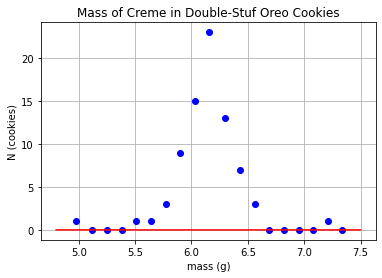

In [3]:
# read the data file
df = pd.read_csv('https://raw.githubusercontent.com/atitus/STLinSTL/main/workshop2/04-applications/double-stuff-oreos.txt', sep='\t')
df.head()

# define arrays for the data
xdata = df['mass (g)']
ydata = df['N cookies']

# mathematical model
# x is the independent variable
# a, b, c are the curve-fit parameters
model = lambda x,a,b,c: a*np.exp(-(1/2)*((x-b)/c)**2)

# define constants and create points for a linear function
# a, b, c are initial guesses
a = 1
b = 1
c = 1
xfit = np.linspace(4.8,7.5,100) # dependent variable used for drawing a best-fit curve
yfit = model(xfit, a, b, c) # dependent variable used for drawing a best-fit curve

# plot data and the best-fit function on the same graph
fig = plt.figure()
plt.title("Mass of Creme in Double-Stuf Oreo Cookies")
plt.xlabel('mass (g)')
plt.ylabel('N (cookies)')
plt.grid(which='both', axis='both')
plt.plot(xdata, ydata, 'bo')
plt.plot(xfit, yfit, 'r-')
plt.show()


## Exercise - Interpreting the Function

1. If you were to pick a random double-stuff oreo cookie out of a package, what is the most likely mass of creme in the cookie?
1. In finding values of $a$, $b$, and $c$, you had to adjust them up and down. Describe how $a$ affects the curve.
1. Describe how $b$ affects the curve.
1. Describe how $c$ affects the curve.


## Exercise - Automatic Fit

Use the `curve_fit()` function to numerically find the best-fit parameters to the data. The program below does the curve fit. Now, add code to plot the best-fit curve and data on the same graph.

How did the best-fit values of the parameters compare to what you found manually?

In [4]:
# read the data file
df = pd.read_csv('https://raw.githubusercontent.com/atitus/STLinSTL/main/workshop2/04-applications/double-stuff-oreos.txt', sep='\t')
df.head()

# define arrays for the data
xdata = df['mass (g)']
ydata = df['N cookies']

# mathematical model
model = lambda x,a,b,c: a*np.exp(-(1/2)*((x-b)/c)**2)

# find best-fit parameters
initial_guess = [1, 1, 1] #initial guess of a, b, c
parameters, stats = curve_fit(model, xdata, ydata, p0=initial_guess)
a, b, c = parameters
print("The best-fit function is a*np.exp(-(1/2)*((x-b)/c)**2) where a={:.4f}, b={:.4f}, c={:.4f}.".format(a, b, c))

# plot the data and best-fit curve

The best-fit function is a*np.exp(-(1/2)*((x-b)/c)**2) where a=20.6872, b=6.1488, c=0.1860.
